# Lab6: Logistic Regression, LDA, Ensemble methods

### Дабеска Мила 193263

&nbsp;

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('history-of-rock-spotify.csv')
dataset.drop(['index', 'danceability.1'], axis=1, inplace = True)
dataset.set_index('name', inplace=True)
dataset

,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
name,,,,,,,,,,,,,,,
Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406
Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357
Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734


In [3]:
dataset = dataset.apply(LabelEncoder().fit_transform)
dataset.head()

,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
name,,,,,,,,,,,,,,,
Smells Like Teen Spirit,942,35,3827,74,363,101,752,925,1,599,3630,332,2084,3,708
Stairway to Heaven - Remaster,772,15,4639,78,199,2350,186,1476,9,609,684,107,321,3,185
Bohemian Rhapsody - Remastered 2011,1045,19,4316,74,253,2085,243,0,0,736,1252,304,4010,3,216
Imagine - Remastered 2010,704,15,995,77,408,2602,116,2284,0,530,618,20,90,3,157
(I Can't Get No) Satisfaction - Mono Version,1516,9,1949,77,584,1484,703,1941,2,621,2061,106,3613,3,919


In [4]:
X = dataset.drop(['key'], axis = 1)
Y = dataset.key.values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

&nbsp;

## Logistic regression

In [7]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [8]:
y_pred = model.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.19      0.15       126
           1       0.06      0.03      0.03        80
           2       0.11      0.16      0.13       147
           3       0.00      0.00      0.00        22
           4       0.15      0.02      0.03       112
           5       0.00      0.00      0.00        81
           6       0.00      0.00      0.00        65
           7       0.13      0.22      0.16       135
           8       0.00      0.00      0.00        48
           9       0.18      0.41      0.25       163
          10       0.00      0.00      0.00        56
          11       0.00      0.00      0.00        62

    accuracy                           0.14      1097
   macro avg       0.06      0.09      0.06      1097
weighted avg       0.09      0.14      0.10      1097



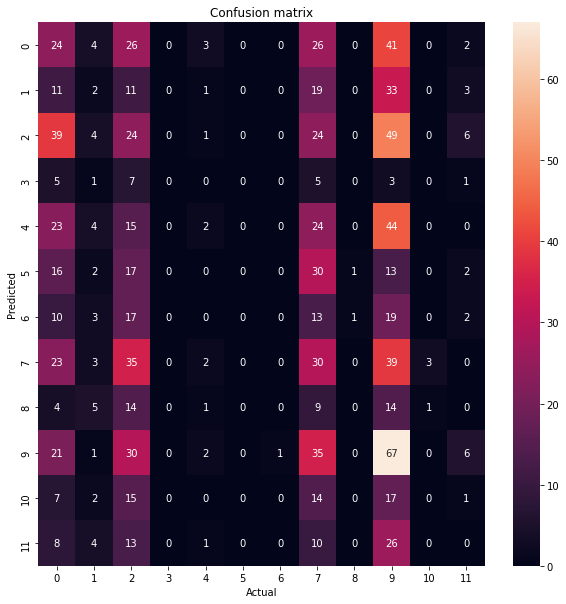

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

(array([ 53., 158., 247., 258., 191., 114.,  51.,  20.,   4.,   1.]),
 array([0.10827205, 0.123272  , 0.13827196, 0.15327192, 0.16827188,
        0.18327183, 0.19827179, 0.21327175, 0.2282717 , 0.24327166,
        0.25827162]),
 <BarContainer object of 10 artists>)

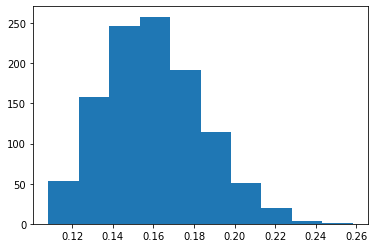

In [11]:
y_pred_proba = model.predict_proba(X_test)
plt.hist([max(x) for x in y_pred_proba])

In [12]:
y_pred_proba

array([[0.07348431, 0.10133461, 0.12591635, ..., 0.15419012, 0.04447113,
        0.07871364],
       [0.21725162, 0.04754349, 0.13977867, ..., 0.13396969, 0.02687172,
        0.01835484],
       [0.15251543, 0.05778303, 0.13978356, ..., 0.16006044, 0.02529961,
        0.04083634],
       ...,
       [0.11204233, 0.1002071 , 0.14240808, ..., 0.13195838, 0.04283357,
        0.0569699 ],
       [0.1098939 , 0.11140517, 0.12803651, ..., 0.11354005, 0.03871016,
        0.07912091],
       [0.10990385, 0.05407805, 0.14861298, ..., 0.18160822, 0.04376226,
        0.06971055]])

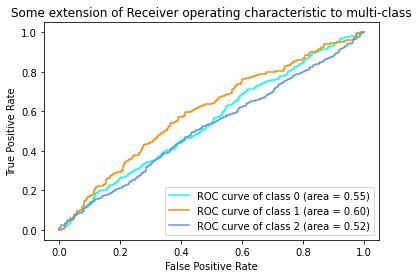

In [13]:
y_binarize = label_binarize(Y, classes=[0, 1, 2])


X_train, X_test, y_train, y_test = train_test_split(X, y_binarize, test_size=.5,
                                                    random_state=0)


classifier = OneVsRestClassifier(LogisticRegression(max_iter=10000))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

&nbsp;

## Linear Discriminant Analysis (LDA)

In [14]:
lda = LDA()
X_lda = lda.fit(X, Y).transform(X)

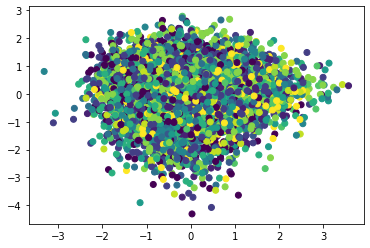

In [15]:
plt.scatter(x=X_lda[:,0], y=X_lda[:,1], c=Y);

&nbsp;

## Ensemble methods

In [16]:
des_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [17]:
des_tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
desTree_pred = des_tree.predict(X_test)
knn_pred = knn.predict(X_test)

averaged_preds = (desTree_pred + knn_pred)//3
acc = accuracy_score(y_test, averaged_preds)
print(acc)

0.6706783369803063


In [21]:
voting_clf = VotingClassifier(estimators=[('KNN', knn), ('DTree', des_tree), ('LogReg', model)], voting='hard')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_test)
acc = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds, average="macro")

print("Accuracy is: " + str(acc))
print("F1 Score is: " + str(f1))

Accuracy is: 0.14767547857793983
F1 Score is: 0.08489044650253817


In [22]:
logreg_bagging_model = BaggingClassifier(base_estimator=model, n_estimators=5)
dtree_bagging_model = BaggingClassifier(base_estimator=des_tree, n_estimators=5)
random_forest = RandomForestClassifier(n_estimators=10)
extra_trees = ExtraTreesClassifier(n_estimators=10)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20)
    results = cross_val_score(model, X_train, y_train, cv=k_folds)
    print(results.mean())

bagging_ensemble(logreg_bagging_model)
bagging_ensemble(dtree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)

0.1458634288086343
0.1317579908675799
0.12627023661270237
0.12239829804898297


In [23]:
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=10)
results = cross_val_score(model, X_test, y_test, cv=kfold)
print(results.mean())

0.11860717264386991
